***CLUSTERING ANALYSIS***

In [3]:
#modules
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score,davies_bouldin_score
import warnings
warnings.filterwarnings('ignore')

In [4]:
df=pd.read_csv('Mall_Customers.csv')

***Exploratory Data Analysis (EDA)***

In [5]:
df.shape

(200, 5)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [7]:
df.dtypes

,0
CustomerID,int64
Gender,object
Age,int64
Annual Income (k$),int64
Spending Score (1-100),int64


In [8]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [9]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [15]:
df.tail()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
195,Female,35,120,79
196,Female,45,126,28
197,Male,32,126,74
198,Male,32,137,18
199,Male,30,137,83


In [17]:
#Drop Unnecessary columns
if 'CustomerID' in df.columns:
    df=df.drop(columns=['CustomerID'],axis=1)
else:
    print("Column 'CustomerID' not found in DataFrame.")
df.head()

Column 'CustomerID' not found in DataFrame.


,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


In [18]:
print(df.duplicated().sum())

0


In [22]:
df=df.drop_duplicates()

In [23]:
df.isnull().sum()

,0
Gender,0
Age,0
Annual Income (k$),0
Spending Score (1-100),0


In [25]:
df=df.dropna()

In [26]:
#Convert String data to numeric data
df['Gender']=LabelEncoder().fit_transform(df['Gender'])

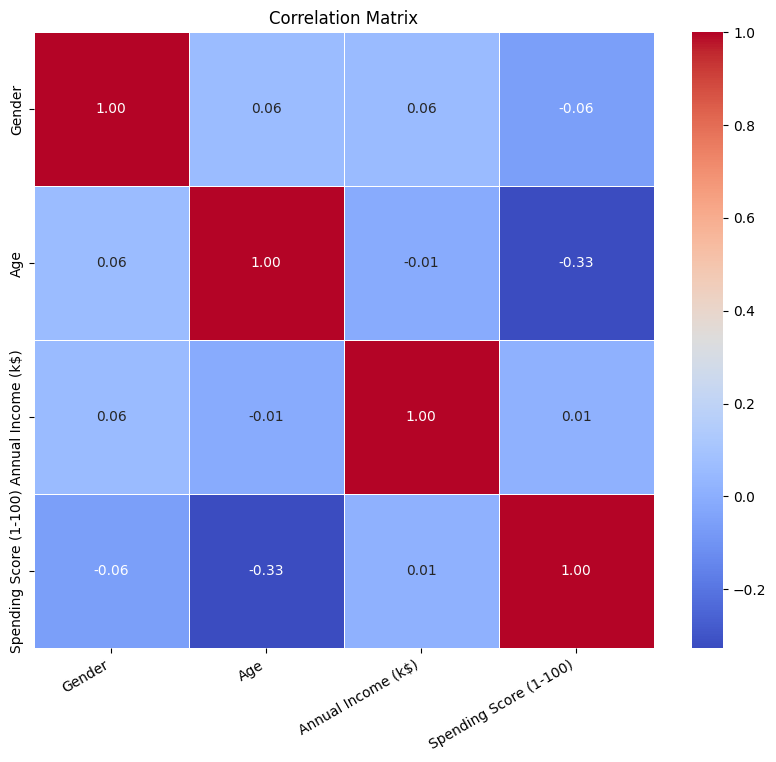

In [27]:
#Correlation Matrix
correlation_matrix=df.corr()
plt.figure(figsize=(10,8))
sns.heatmap(correlation_matrix,annot=True,cmap='coolwarm',fmt='.2f',linewidth=0.5)
plt.title('Correlation Matrix')
plt.xticks(rotation=30,ha='right')
plt.show()


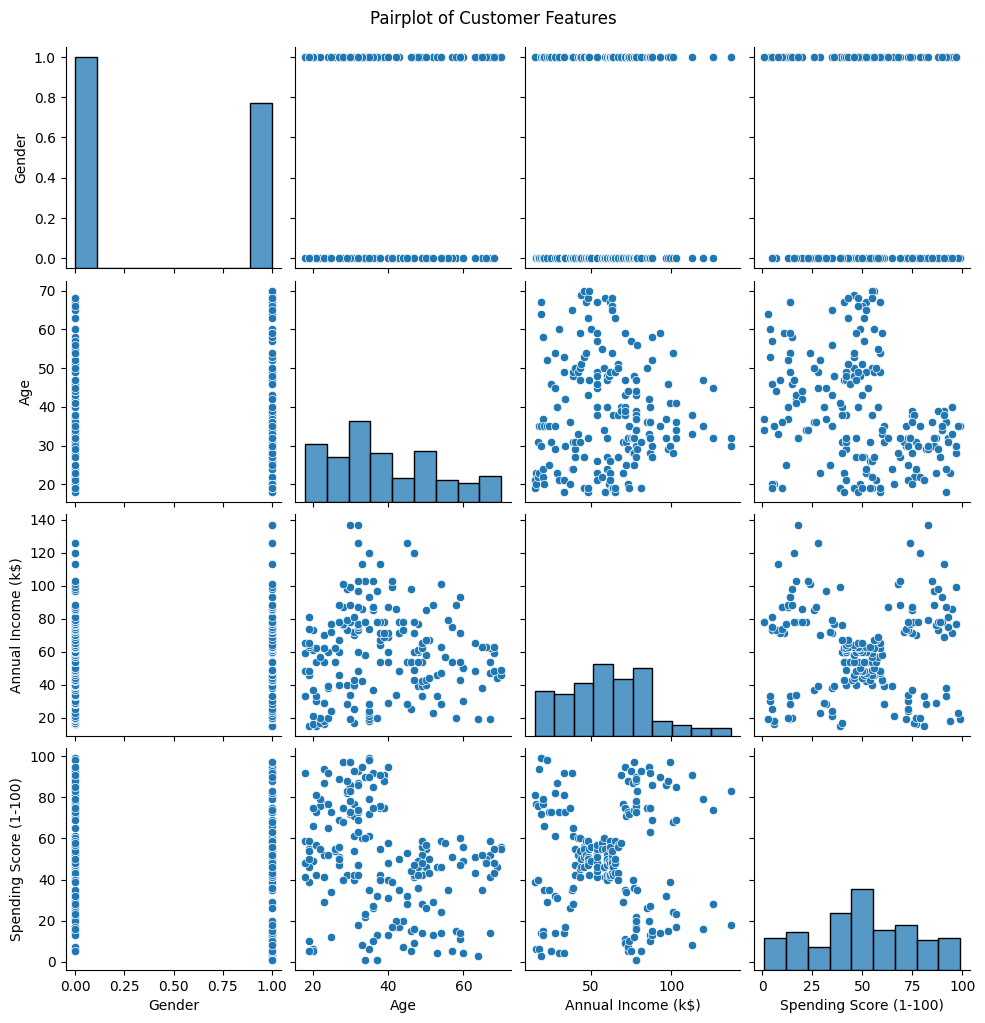

In [29]:
#Visualize data
sns.pairplot(df)
plt.suptitle('Pairplot of Customer Features',y=1.02)
plt.show()

Text(0.5, 1.0, 'Distribution of Age')

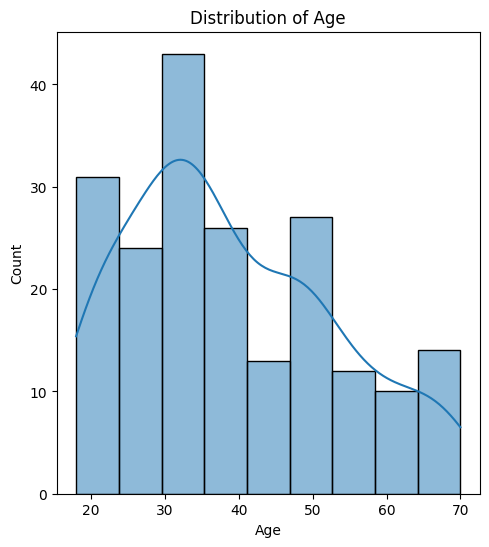

In [30]:
#Distribution of age and annual income
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
sns.histplot(df['Age'],kde=True)
plt.title('Distribution of Age')

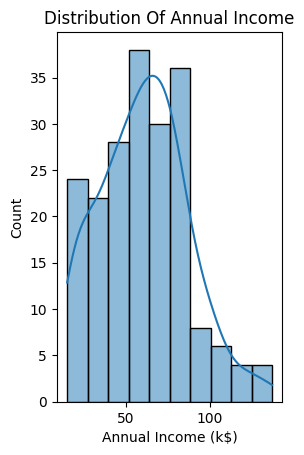

In [31]:
plt.subplot(1,2,2)
sns.histplot(df['Annual Income (k$)'],kde=True)
plt.title('Distribution Of Annual Income')
plt.show()

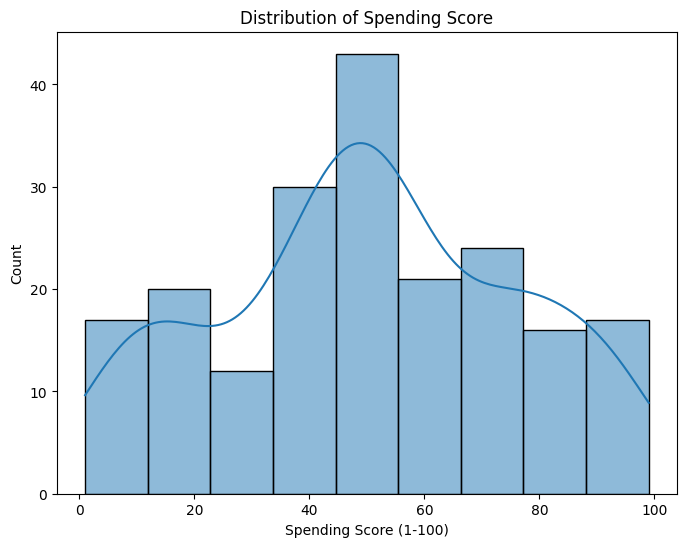

In [32]:
#Spending Score Distribution
plt.figure(figsize=(8, 6))
sns.histplot(df['Spending Score (1-100)'], kde=True)
plt.title('Distribution of Spending Score')
plt.show()


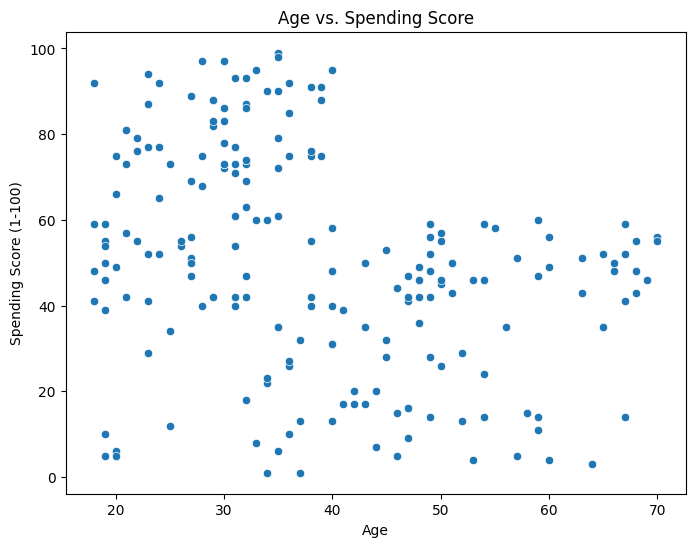

In [33]:
#Scatter Plot of Age vs Spending Score
plt.figure(figsize=(8,6))
sns.scatterplot(x='Age',y='Spending Score (1-100)',data=df)
plt.title('Age vs. Spending Score')
plt.show()

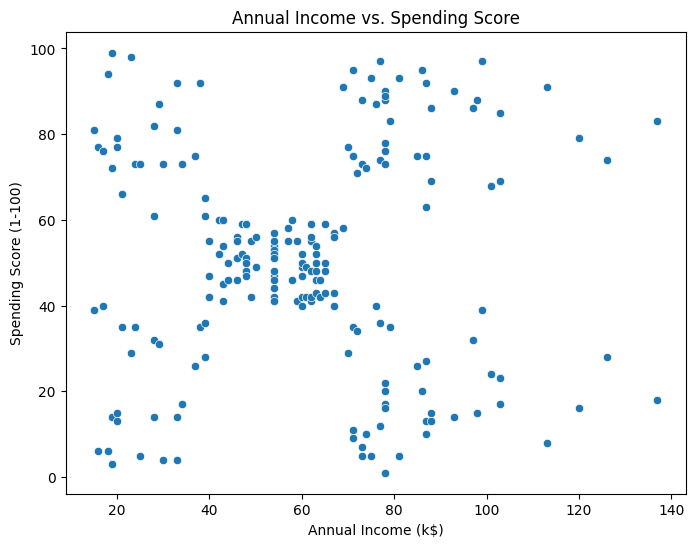

In [34]:
# Scatter plot of Annual Income vs. Spending Score
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', data=df)
plt.title('Annual Income vs. Spending Score')
plt.show()

***Data PreProcessing***

***Elbow Method***

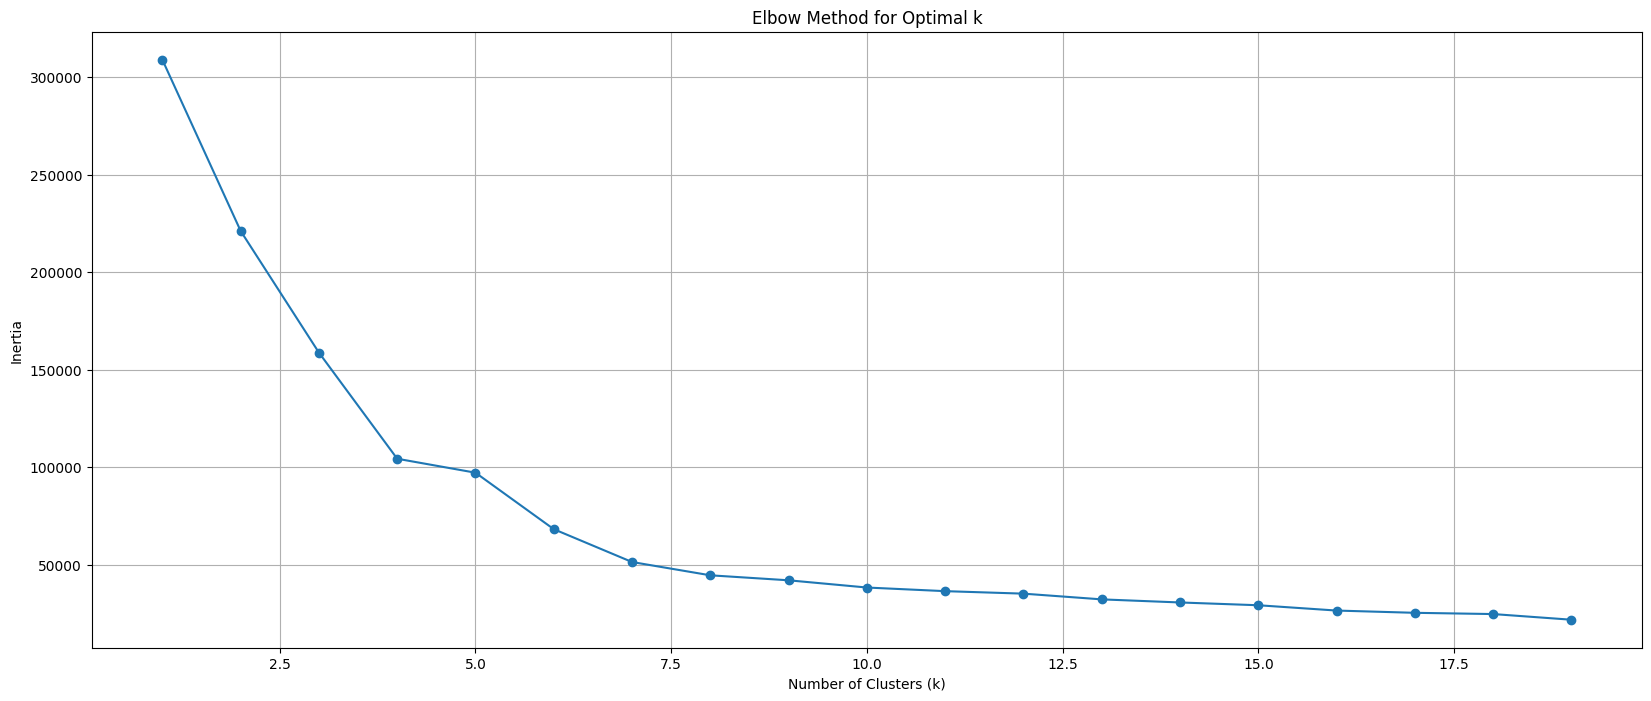

In [36]:
inertia=[]
K=range(1,20)

for k in K:
  kmeans=KMeans(n_clusters=k,random_state=42)
  kmeans.fit(df)
  inertia.append(kmeans.inertia_)


#Plot Elbow Graph
plt.figure(figsize=(20,8))
plt.plot(K,inertia,marker='o',linestyle='-')
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Inertia")
plt.title("Elbow Method for Optimal k")
plt.grid(True)
plt.show()

In [42]:
X=df[['Gender','Age','Annual Income (k$)','Annual Income (k$)']]

In [44]:
optimal_k=6
kmeans=KMeans(n_clusters=optimal_k,random_state=42)
df['Cluster']=kmeans.fit_predict(X)

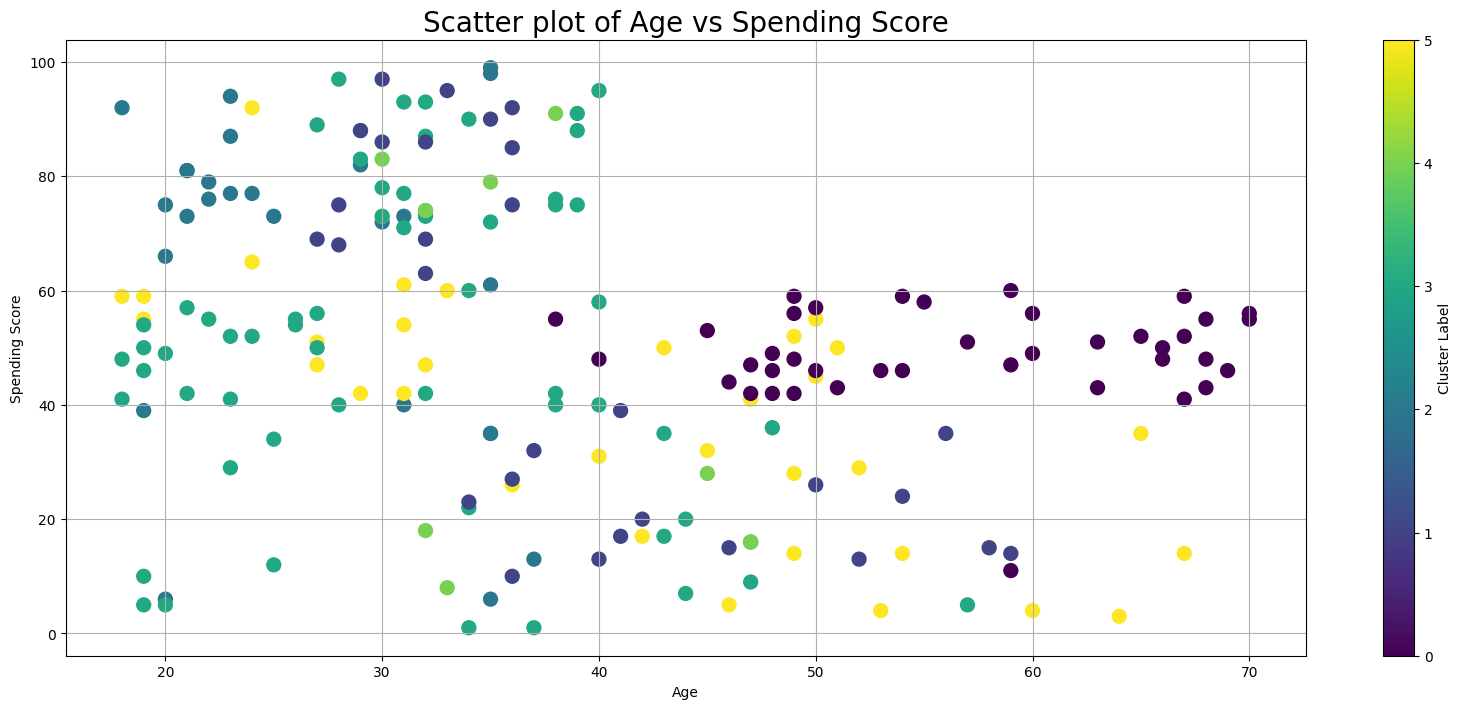

In [45]:
plt.figure(figsize=(20, 8))
plt.title('Scatter plot of Age vs Spending Score', fontsize=20)
plt.xlabel('Age')
plt.ylabel('Spending Score')
plt.scatter(x=df['Age'],y=df['Spending Score (1-100)'],c=kmeans.labels_,s=100)
plt.colorbar(label='Cluster Label')
plt.grid(True)
plt.show()

In [46]:
silhouette_avg = silhouette_score(X, df['Cluster'])
davies_bouldin = davies_bouldin_score(X, df['Cluster'])
print(f"Silhouette Score: {silhouette_avg:}")
print(f"Davies-Bouldin Score: {davies_bouldin:}")

Silhouette Score: 0.38194388119328354
Davies-Bouldin Score: 0.8646082371201128


In [47]:
import plotly.express as px

customersdata = df.copy()


customersdata = customersdata.rename(columns={
    'Spending Score (1-100)': 'money_spent',
    'Annual Income (k$)': 'annual_income',

})


from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=5, random_state=42)


customersdata['clusters'] = kmeans.fit_predict(customersdata[['annual_income', 'Age', 'money_spent']])


figure = px.scatter_3d(customersdata,
                    color='clusters',
                    x="annual_income",
                    y="Age",
                    z="money_spent",
                    category_orders={"clusters": ["0", "1", "2", "3", "4"]}
                    )
figure.update_layout()
figure.show()